# Regression model to predict Asthma prevalence from Air quality data

In [1]:
# import library

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import library machine learning

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from tqdm.auto import tqdm

import pickle

Two datasets are merged in this project "Air Quality" and "Asthma prevalence"

The 1st dataset is "1980-2021 Yearly Air Quality Index from the EPA"
https://www.kaggle.com/threnjen/40-years-of-air-quality-index-from-the-epa-yearly

The 2nd dataset is https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2022-release/uuui-fh3m/about_data , https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2021-release/cj8b-94cj/about_data , https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2020-release/ndzg-9nmv/about_data

In [3]:
#1st dataset for Air-quality by Counties of USA
data_air = 'aqi_yearly_1980_to_2021.csv'

df_air = pd.read_csv(data_air)

df_air = df_air[(df_air['Year']==2020)]

print(len(df_air))

1040


In [4]:
df_air.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
#EDA: Remove spaces from column names and data, changing cases
df_air.columns = df_air.columns.str.lower().str.replace(' ', '_')


In [6]:
df_air.columns

Index(['state', 'county', 'year', 'days_with_aqi', 'good_days',
       'moderate_days', 'unhealthy_for_sensitive_groups_days',
       'unhealthy_days', 'very_unhealthy_days', 'hazardous_days', 'max_aqi',
       '90th_percentile_aqi', 'median_aqi', 'days_co', 'days_no2',
       'days_ozone', 'days_so2', 'days_pm2.5', 'days_pm10', 'latitude',
       'longitude'],
      dtype='object')

In [7]:
df_air

,state,county,year,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,90th_percentile_aqi,median_aqi,days_co,days_no2,days_ozone,days_so2,days_pm2.5,days_pm10,latitude,longitude
33146,Alabama,Baldwin,2020,269,250,19,0,0,0,0,...,49,36,0,0,198,0,71,0,30.497478,-87.880258
33147,Alabama,Clay,2020,108,99,9,0,0,0,0,...,49,26,0,0,0,0,108,0,33.284928,-85.803608
33148,Alabama,DeKalb,2020,364,350,14,0,0,0,0,...,45,36,0,0,331,0,33,0,34.289001,-85.970065
33149,Alabama,Elmore,2020,197,197,0,0,0,0,0,...,41,31,0,0,197,0,0,0,32.535680,-86.255193
33150,Alabama,Etowah,2020,278,260,18,0,0,0,0,...,46,34,0,0,204,0,74,0,33.904039,-86.053867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34181,Wyoming,Sublette,2020,366,297,64,4,1,0,0,...,61,44,0,0,355,0,11,0,42.928800,-109.788000
34182,Wyoming,Sweetwater,2020,366,238,116,7,4,0,1,...,76,46,0,5,253,0,7,101,41.763060,-108.734440
34183,Wyoming,Teton,2020,366,318,36,7,5,0,0,...,54,42,0,0,329,0,37,0,44.565217,-110.400996
34184,Wyoming,Uinta,2020,366,323,41,2,0,0,0,...,51,40,0,2,225,0,0,139,41.408699,-110.702153


In [8]:
# Create a new column by combining 'state' and 'county'
df_air['state_county'] = df_air['state'] + ' - ' + df_air['county']


In [9]:
df_air[['state', 'county', 'state_county']].head()

,state,county,state_county
33146,Alabama,Baldwin,Alabama - Baldwin
33147,Alabama,Clay,Alabama - Clay
33148,Alabama,DeKalb,Alabama - DeKalb
33149,Alabama,Elmore,Alabama - Elmore
33150,Alabama,Etowah,Alabama - Etowah


In [10]:
df_air['year'].unique()

array([2020], dtype=int64)

The 2nd dataset is https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2022-release/uuui-fh3m/about_data , https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2021-release/cj8b-94cj/about_data , https://data.cdc.gov/500-Cities-Places/PLACES-Place-Data-GIS-Friendly-Format-2020-release/ndzg-9nmv/about_data

In [11]:
#2nd dataset for Asthma prevalence by Counties of USA
data_asthma = '2020-PLACES__County_Data__GIS_Friendly_Format___2022_release_20241125.csv'

df_asthma = pd.read_csv(data_asthma)
print('Number of rows for dataset', len(df_asthma))

Number of rows for dataset 3143


In [12]:
# Displays columns containing the word "ASTHMA"
asthma_columns = df_asthma.filter(like='ASTHMA', axis=1).columns
print(asthma_columns)


Index(['CASTHMA_CrudePrev', 'CASTHMA_Crude95CI', 'CASTHMA_AdjPrev',
       'CASTHMA_Adj95CI'],
      dtype='object')


In [13]:
df_asthma.columns

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation',
       'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev',
       'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev',
       ...
       'SLEEP_Adj95CI', 'STROKE_CrudePrev', 'STROKE_Crude95CI',
       'STROKE_AdjPrev', 'STROKE_Adj95CI', 'TEETHLOST_CrudePrev',
       'TEETHLOST_Crude95CI', 'TEETHLOST_AdjPrev', 'TEETHLOST_Adj95CI',
       'Geolocation'],
      dtype='object', length=126)

In [14]:
df_asthma.columns.tolist()

['StateAbbr',
 'StateDesc',
 'CountyName',
 'CountyFIPS',
 'TotalPopulation',
 'ACCESS2_CrudePrev',
 'ACCESS2_Crude95CI',
 'ACCESS2_AdjPrev',
 'ACCESS2_Adj95CI',
 'ARTHRITIS_CrudePrev',
 'ARTHRITIS_Crude95CI',
 'ARTHRITIS_AdjPrev',
 'ARTHRITIS_Adj95CI',
 'BINGE_CrudePrev',
 'BINGE_Crude95CI',
 'BINGE_AdjPrev',
 'BINGE_Adj95CI',
 'BPHIGH_CrudePrev',
 'BPHIGH_Crude95CI',
 'BPHIGH_AdjPrev',
 'BPHIGH_Adj95CI',
 'BPMED_CrudePrev',
 'BPMED_Crude95CI',
 'BPMED_AdjPrev',
 'BPMED_Adj95CI',
 'CANCER_CrudePrev',
 'CANCER_Crude95CI',
 'CANCER_AdjPrev',
 'CANCER_Adj95CI',
 'CASTHMA_CrudePrev',
 'CASTHMA_Crude95CI',
 'CASTHMA_AdjPrev',
 'CASTHMA_Adj95CI',
 'CERVICAL_CrudePrev',
 'CERVICAL_Crude95CI',
 'CERVICAL_AdjPrev',
 'CERVICAL_Adj95CI',
 'CHD_CrudePrev',
 'CHD_Crude95CI',
 'CHD_AdjPrev',
 'CHD_Adj95CI',
 'CHECKUP_CrudePrev',
 'CHECKUP_Crude95CI',
 'CHECKUP_AdjPrev',
 'CHECKUP_Adj95CI',
 'CHOLSCREEN_CrudePrev',
 'CHOLSCREEN_Crude95CI',
 'CHOLSCREEN_AdjPrev',
 'CHOLSCREEN_Adj95CI',
 'COLON_SCREEN

In [15]:
# Select the relevant columns: StateDesc, CountyName, TotalPopulation, and asthma column.
df_asthma = df_asthma[['StateDesc', 'CountyName', 'TotalPopulation'] + asthma_columns.tolist()]


In [16]:
df_asthma.isna().sum()

StateDesc            0
CountyName           0
TotalPopulation      0
CASTHMA_CrudePrev    0
CASTHMA_Crude95CI    0
CASTHMA_AdjPrev      0
CASTHMA_Adj95CI      0
dtype: int64

In [17]:
df_asthma

,StateDesc,CountyName,TotalPopulation,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CASTHMA_AdjPrev,CASTHMA_Adj95CI
0,Louisiana,St. Charles,52987,9.1,"( 8.7, 9.5)",9.1,"( 8.7, 9.5)"
1,New Hampshire,Strafford,131533,10.6,"(10.1, 11.2)",10.5,"(10.0, 11.1)"
2,North Carolina,Halifax,49479,10.9,"(10.4, 11.4)",11.1,"(10.6, 11.6)"
3,North Carolina,Martin,22178,10.3,"( 9.9, 10.8)",10.6,"(10.1, 11.0)"
4,North Carolina,Pasquotank,40372,9.7,"( 9.3, 10.1)",9.7,"( 9.3, 10.1)"
...,...,...,...,...,...,...,...
3138,Kentucky,Carroll,10730,11.7,"(11.0, 12.4)",11.7,"(11.1, 12.5)"
3139,Mississippi,Covington,18518,10.4,"(10.0, 10.9)",10.5,"(10.1, 11.0)"
3140,New York,Rensselaer,158108,10.4,"( 9.9, 10.9)",10.4,"(10.0, 11.0)"
3141,Kansas,Russell,6804,9.3,"( 8.8, 9.8)",9.7,"( 9.2, 10.2)"


In [18]:
# Create a new column by combining 'StateDesc' and 'CountyName'
df_asthma['state_county'] = df_asthma['StateDesc'] + ' - ' + df_asthma['CountyName']

In [19]:
df_asthma[['StateDesc', 'CountyName', 'state_county']].head()

,StateDesc,CountyName,state_county
0,Louisiana,St. Charles,Louisiana - St. Charles
1,New Hampshire,Strafford,New Hampshire - Strafford
2,North Carolina,Halifax,North Carolina - Halifax
3,North Carolina,Martin,North Carolina - Martin
4,North Carolina,Pasquotank,North Carolina - Pasquotank


In [20]:
df_asthma['state_county'].nunique()

3143

In [21]:
df_air['state_county'].nunique()

1040

In [22]:
# Check if all unique values ​​from df_air['state_county'] are present in df_asthma['state_county']
all_present = set(df_air['state_county']).issubset(set(df_asthma['state_county']))

# Display the result
print("Are all state_counties in df_air present in df_asthma?:", all_present)


Are all state_counties in df_air present in df_asthma?: False


In [23]:
# Find state_county that is in df_air but not in df_asthma
missing = set(df_air['state_county']) - set(df_asthma['state_county'])

# Display the number and some of the missing values
print("Number of state_county that are missing:", len(missing))
print("Examples of state_county that are missing:", list(missing)[:10])  # Display 10 examples


Number of state_county that are missing: 45
Examples of state_county that are missing: ['Missouri - Saint Charles', 'Alaska - Juneau ', 'Puerto Rico - Bayamon', 'Virgin Islands - St Thomas', 'Puerto Rico - San Juan', 'Alaska - Anchorage ', 'Virginia - Bristol City', 'Country Of Mexico - SONORA', 'Virginia - Hopewell City', 'Puerto Rico - Guaynabo']


In [24]:
# Check for rows containing 'Benito' in column 'state_county'
contains_benito = df_asthma[df_asthma['state_county'].str.contains('Ponce', case=False, na=False)]

# Display the result
print(contains_benito)


Empty DataFrame
Columns: [StateDesc, CountyName, TotalPopulation, CASTHMA_CrudePrev, CASTHMA_Crude95CI, CASTHMA_AdjPrev, CASTHMA_Adj95CI, state_county]
Index: []


In [25]:
# Get unique values ​​of 'state_county' in both DataFrames
unique_air = df_air['state_county'].unique()
unique_asthma = df_asthma['state_county'].unique()

# Filter unique values ​​present in both DataFrames
common_state_county = set(unique_air).intersection(set(unique_asthma))

# Store the result in a new variable or DataFrame
common_state_county_list = list(common_state_county)


In [26]:
common_state_county_list

['Montana - Fergus',
 'New York - Monroe',
 'California - Tuolumne',
 'Arizona - La Paz',
 'California - Riverside',
 'North Carolina - Wake',
 'New Jersey - Hunterdon',
 'North Carolina - Graham',
 'Alabama - DeKalb',
 'California - Ventura',
 'Idaho - Lemhi',
 'Minnesota - Mille Lacs',
 'Montana - Silver Bow',
 'Nevada - Clark',
 'Mississippi - Harrison',
 'Virginia - Rockbridge',
 'Colorado - Jefferson',
 'South Carolina - Spartanburg',
 'California - Mariposa',
 'Washington - Columbia',
 'California - Shasta',
 'Arizona - Cochise',
 'Indiana - Gibson',
 'Missouri - Perry',
 'Texas - Tarrant',
 'Indiana - Shelby',
 'Pennsylvania - Fayette',
 'Louisiana - Caddo',
 'Michigan - Benzie',
 'New York - Westchester',
 'Kansas - Trego',
 'Washington - Pend Oreille',
 'Wyoming - Carbon',
 'Georgia - Floyd',
 'South Dakota - Codington',
 'Washington - Lewis',
 'Wisconsin - La Crosse',
 'New Hampshire - Merrimack',
 'Wyoming - Johnson',
 'New Mexico - Eddy',
 'Georgia - Hall',
 'Kentucky - Car

In [27]:
len(common_state_county_list)

995

In [28]:
# Read data from CSV file
data_air = 'aqi_yearly_1980_to_2021.csv'
df_air = pd.read_csv(data_air)

# Filter data for years 2020, 2019, and 2018
df_air = df_air[df_air['Year'].isin([2020, 2019, 2018])]

df_air.columns = df_air.columns.str.lower().str.replace(' ', '_')

In [29]:
# Create a new column by combining 'state' and 'county'
df_air['state_county'] = df_air['state'] + ' - ' + df_air['county']
df_air[['state', 'county', 'state_county']].head()

,state,county,state_county
31091,Alabama,Baldwin,Alabama - Baldwin
31092,Alabama,Clay,Alabama - Clay
31093,Alabama,DeKalb,Alabama - DeKalb
31094,Alabama,Elmore,Alabama - Elmore
31095,Alabama,Etowah,Alabama - Etowah


In [30]:
df_air.columns

Index(['state', 'county', 'year', 'days_with_aqi', 'good_days',
       'moderate_days', 'unhealthy_for_sensitive_groups_days',
       'unhealthy_days', 'very_unhealthy_days', 'hazardous_days', 'max_aqi',
       '90th_percentile_aqi', 'median_aqi', 'days_co', 'days_no2',
       'days_ozone', 'days_so2', 'days_pm2.5', 'days_pm10', 'latitude',
       'longitude', 'state_county'],
      dtype='object')

In [31]:
df_air['year'].unique()

array([2018, 2019, 2020], dtype=int64)

In [32]:
# Filter df_air for year 2020
df_air_2020 = df_air[df_air['year'] == 2020]

# Check if 'state_county' contains a value in common_state_county_list
df_air_2020_filtered = df_air_2020[df_air_2020['state_county'].isin(common_state_county_list)]

print(len(df_air_2020_filtered))


995


In [33]:
# Filter df_air for year 2019
df_air_2019 = df_air[df_air['year'] == 2019]

# Check if 'state_county' contains a value in common_state_county_list
df_air_2019_filtered = df_air_2019[df_air_2019['state_county'].isin(common_state_county_list)]

print(len(df_air_2019_filtered))


987


In [34]:
# Filter df_air for year 2018
df_air_2018 = df_air[df_air['year'] == 2018]

# Check if 'state_county' contains a value in common_state_county_list
df_air_2018_filtered = df_air_2018[df_air_2018['state_county'].isin(common_state_county_list)]

print(len(df_air_2018_filtered))


983


In [35]:
# Filter data for 2018, 2019 and 2020
df_air_2018_filtered = df_air_2018[df_air_2018['state_county'].isin(common_state_county_list)]
df_air_2019_filtered = df_air_2019[df_air_2019['state_county'].isin(common_state_county_list)]
df_air_2020_filtered = df_air_2020[df_air_2020['state_county'].isin(common_state_county_list)]

# Combine all filtered state_counties from 2018-2020
all_filtered_state_county = pd.concat([
    df_air_2018_filtered['state_county'],
    df_air_2019_filtered['state_county'],
    df_air_2020_filtered['state_county']
])

# Get state_county contained in all years
common_state_county_all_years = all_filtered_state_county.value_counts()

# Display results
common_state_county_all_years


state_county
Alabama - Baldwin            3
Ohio - Harrison              3
Ohio - Knox                  3
Ohio - Lake                  3
Ohio - Lawrence              3
                            ..
Texas - Atascosa             1
Texas - Brazos               1
Texas - Karnes               1
Texas - Wilson               1
Washington - Pend Oreille    1
Name: count, Length: 995, dtype: int64

In [36]:
# Filter 'state_county' that appears 3 times
state_county_3_times = common_state_county_all_years[common_state_county_all_years == 3]

# Display results
state_county_3_times


state_county
Alabama - Baldwin        3
Ohio - Harrison          3
Ohio - Knox              3
Ohio - Lake              3
Ohio - Lawrence          3
                        ..
Kentucky - Morgan        3
Kentucky - Livingston    3
Kentucky - Jessamine     3
Kentucky - Jefferson     3
Kentucky - McCracken     3
Name: count, Length: 982, dtype: int64

In [37]:
# Convert state_county that occurs 3 times to a list
state_county_3_list = state_county_3_times.index.tolist()

# Display the result
state_county_3_list


['Alabama - Baldwin',
 'Ohio - Harrison',
 'Ohio - Knox',
 'Ohio - Lake',
 'Ohio - Lawrence',
 'Ohio - Licking',
 'Ohio - Lorain',
 'Ohio - Lucas',
 'Ohio - Madison',
 'Ohio - Mahoning',
 'Ohio - Medina',
 'Ohio - Miami',
 'Ohio - Montgomery',
 'Ohio - Morgan',
 'Ohio - Noble',
 'Ohio - Portage',
 'Ohio - Preble',
 'Ohio - Scioto',
 'Ohio - Stark',
 'Ohio - Summit',
 'Ohio - Trumbull',
 'Ohio - Warren',
 'Ohio - Washington',
 'Ohio - Wood',
 'Oklahoma - Adair',
 'Oklahoma - Canadian',
 'Oklahoma - Carter',
 'Oklahoma - Cleveland',
 'Oklahoma - Comanche',
 'Ohio - Jefferson',
 'Ohio - Hamilton',
 'North Carolina - Union',
 'Ohio - Greene',
 'North Carolina - Yancey',
 'North Dakota - Billings',
 'North Dakota - Burke',
 'North Dakota - Burleigh',
 'North Dakota - Cass',
 'North Dakota - Dunn',
 'North Dakota - McKenzie',
 'North Dakota - Mercer',
 'North Dakota - Oliver',
 'North Dakota - Ward',
 'North Dakota - Williams',
 'Ohio - Adams',
 'Ohio - Allen',
 'Ohio - Ashtabula',
 'Ohio - 

In [38]:
data_asthma_2020 = '2020-PLACES__County_Data__GIS_Friendly_Format___2022_release_20241125.csv'
df_asthma_2020 = pd.read_csv(data_asthma_2020)
print('Number of rows for dataset', len(df_asthma_2020))

data_asthma_2019 = '2019-PLACES__County_Data__GIS_Friendly_Format___2021_release_20241125.csv'
df_asthma_2019 = pd.read_csv(data_asthma_2019)
print('Number of rows for dataset', len(df_asthma_2019))

data_asthma_2018 = '2018-PLACES__County_Data__GIS_Friendly_Format___2020_release_20241125.csv'
df_asthma_2018 = pd.read_csv(data_asthma_2018)
print('Number of rows for dataset', len(df_asthma_2018))


Number of rows for dataset 3143
Number of rows for dataset 3142
Number of rows for dataset 3142


In [39]:
df_asthma_2020.columns

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation',
       'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev',
       'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev',
       ...
       'SLEEP_Adj95CI', 'STROKE_CrudePrev', 'STROKE_Crude95CI',
       'STROKE_AdjPrev', 'STROKE_Adj95CI', 'TEETHLOST_CrudePrev',
       'TEETHLOST_Crude95CI', 'TEETHLOST_AdjPrev', 'TEETHLOST_Adj95CI',
       'Geolocation'],
      dtype='object', length=126)

In [40]:
df_asthma_2019.columns

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation',
       'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev',
       'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev',
       ...
       'SLEEP_Adj95CI', 'STROKE_CrudePrev', 'STROKE_Crude95CI',
       'STROKE_AdjPrev', 'STROKE_Adj95CI', 'TEETHLOST_CrudePrev',
       'TEETHLOST_Crude95CI', 'TEETHLOST_AdjPrev', 'TEETHLOST_Adj95CI',
       'Geolocation'],
      dtype='object', length=126)

In [41]:
df_asthma_2018.columns

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation',
       'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev',
       'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev',
       ...
       'SLEEP_Adj95CI', 'STROKE_CrudePrev', 'STROKE_Crude95CI',
       'STROKE_AdjPrev', 'STROKE_Adj95CI', 'TEETHLOST_CrudePrev',
       'TEETHLOST_Crude95CI', 'TEETHLOST_AdjPrev', 'TEETHLOST_Adj95CI',
       'Geolocation'],
      dtype='object', length=118)

In [42]:
# Displays columns containing the word "ASTHMA"
asthma_columns = df_asthma_2020.filter(like='ASTHMA', axis=1).columns
print(asthma_columns)

Index(['CASTHMA_CrudePrev', 'CASTHMA_Crude95CI', 'CASTHMA_AdjPrev',
       'CASTHMA_Adj95CI'],
      dtype='object')


In [43]:
df_asthma_2020 = df_asthma_2020[['StateDesc', 'CountyName', 'TotalPopulation'] + asthma_columns.tolist()]
df_asthma_2019 = df_asthma_2019[['StateDesc', 'CountyName', 'TotalPopulation'] + asthma_columns.tolist()]
df_asthma_2018 = df_asthma_2018[['StateDesc', 'CountyName', 'TotalPopulation'] + asthma_columns.tolist()]

In [44]:
df_asthma_2020['state_county'] = df_asthma_2020['StateDesc'] + ' - ' + df_asthma_2020['CountyName']
df_asthma_2019['state_county'] = df_asthma_2019['StateDesc'] + ' - ' + df_asthma_2019['CountyName']
df_asthma_2018['state_county'] = df_asthma_2018['StateDesc'] + ' - ' + df_asthma_2018['CountyName']

In [45]:
state_county_in_asthma_2020 = df_asthma_2020['state_county'].isin(state_county_3_list)
matching_state_county_2020 = df_asthma_2020['state_county'][state_county_in_asthma_2020].unique()
print(len(matching_state_county_2020))

state_county_in_asthma_2019 = df_asthma_2019['state_county'].isin(state_county_3_list)
matching_state_county_2019 = df_asthma_2019['state_county'][state_county_in_asthma_2019].unique()
print(len(matching_state_county_2019))

state_county_in_asthma_2018 = df_asthma_2018['state_county'].isin(state_county_3_list)
matching_state_county_2018 = df_asthma_2018['state_county'][state_county_in_asthma_2018].unique()
print(len(matching_state_county_2018))

982
982
982


In [46]:
df_air

,state,county,year,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,median_aqi,days_co,days_no2,days_ozone,days_so2,days_pm2.5,days_pm10,latitude,longitude,state_county
31091,Alabama,Baldwin,2018,270,245,25,0,0,0,0,...,35,0,0,214,0,56,0,30.497478,-87.880258,Alabama - Baldwin
31092,Alabama,Clay,2018,110,103,7,0,0,0,0,...,27,0,0,0,0,110,0,33.284928,-85.803608,Alabama - Clay
31093,Alabama,DeKalb,2018,350,316,34,0,0,0,0,...,35,0,0,317,0,33,0,34.289001,-85.970065,Alabama - DeKalb
31094,Alabama,Elmore,2018,222,203,19,0,0,0,0,...,33,0,0,222,0,0,0,32.535680,-86.255193,Alabama - Elmore
31095,Alabama,Etowah,2018,324,231,92,0,1,0,0,...,41,0,0,179,0,145,0,33.904039,-86.053867,Alabama - Etowah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34181,Wyoming,Sublette,2020,366,297,64,4,1,0,0,...,44,0,0,355,0,11,0,42.928800,-109.788000,Wyoming - Sublette
34182,Wyoming,Sweetwater,2020,366,238,116,7,4,0,1,...,46,0,5,253,0,7,101,41.763060,-108.734440,Wyoming - Sweetwater
34183,Wyoming,Teton,2020,366,318,36,7,5,0,0,...,42,0,0,329,0,37,0,44.565217,-110.400996,Wyoming - Teton
34184,Wyoming,Uinta,2020,366,323,41,2,0,0,0,...,40,0,2,225,0,0,139,41.408699,-110.702153,Wyoming - Uinta


In [47]:
# Filter df_air to only contain state_counties that are in state_county_3_list
df_air_filtered = df_air[df_air['state_county'].isin(state_county_3_list)]

# Display the results
df_air_filtered


,state,county,year,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,median_aqi,days_co,days_no2,days_ozone,days_so2,days_pm2.5,days_pm10,latitude,longitude,state_county
31091,Alabama,Baldwin,2018,270,245,25,0,0,0,0,...,35,0,0,214,0,56,0,30.497478,-87.880258,Alabama - Baldwin
31092,Alabama,Clay,2018,110,103,7,0,0,0,0,...,27,0,0,0,0,110,0,33.284928,-85.803608,Alabama - Clay
31093,Alabama,DeKalb,2018,350,316,34,0,0,0,0,...,35,0,0,317,0,33,0,34.289001,-85.970065,Alabama - DeKalb
31094,Alabama,Elmore,2018,222,203,19,0,0,0,0,...,33,0,0,222,0,0,0,32.535680,-86.255193,Alabama - Elmore
31095,Alabama,Etowah,2018,324,231,92,0,1,0,0,...,41,0,0,179,0,145,0,33.904039,-86.053867,Alabama - Etowah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34181,Wyoming,Sublette,2020,366,297,64,4,1,0,0,...,44,0,0,355,0,11,0,42.928800,-109.788000,Wyoming - Sublette
34182,Wyoming,Sweetwater,2020,366,238,116,7,4,0,1,...,46,0,5,253,0,7,101,41.763060,-108.734440,Wyoming - Sweetwater
34183,Wyoming,Teton,2020,366,318,36,7,5,0,0,...,42,0,0,329,0,37,0,44.565217,-110.400996,Wyoming - Teton
34184,Wyoming,Uinta,2020,366,323,41,2,0,0,0,...,40,0,2,225,0,0,139,41.408699,-110.702153,Wyoming - Uinta


In [48]:
df_asthma_2020_filtered = df_asthma_2020[df_asthma_2020['state_county'].isin(state_county_3_list)]
df_asthma_2019_filtered = df_asthma_2019[df_asthma_2019['state_county'].isin(state_county_3_list)]
df_asthma_2018_filtered = df_asthma_2018[df_asthma_2018['state_county'].isin(state_county_3_list)]

In [49]:
print(len(df_asthma_2020_filtered))
print(len(df_asthma_2019_filtered))
print(len(df_asthma_2018_filtered))

982
982
982


In [50]:
df_asthma_2020_filtered.isna().sum()

StateDesc            0
CountyName           0
TotalPopulation      0
CASTHMA_CrudePrev    0
CASTHMA_Crude95CI    0
CASTHMA_AdjPrev      0
CASTHMA_Adj95CI      0
state_county         0
dtype: int64

In [51]:
df_asthma_2019_filtered.isna().sum()

StateDesc             0
CountyName            0
TotalPopulation       0
CASTHMA_CrudePrev    16
CASTHMA_Crude95CI    16
CASTHMA_AdjPrev      16
CASTHMA_Adj95CI      16
state_county          0
dtype: int64

In [52]:
df_asthma_2018_filtered.isna().sum()

StateDesc            0
CountyName           0
TotalPopulation      0
CASTHMA_CrudePrev    0
CASTHMA_Crude95CI    0
CASTHMA_AdjPrev      0
CASTHMA_Adj95CI      0
state_county         0
dtype: int64

In [53]:
df_asthma_2019 = df_asthma_2019_filtered.dropna()

In [54]:
# Get unique values ​​from 'state_county' and convert them to a list
state_county_2019_list = df_asthma_2019['state_county'].unique().tolist()

# Display the results
state_county_2019_list

['Minnesota - Carlton',
 'Texas - Hidalgo',
 'Missouri - Cass',
 'New York - Suffolk',
 'Ohio - Medina',
 'Florida - Okaloosa',
 'New Mexico - Socorro',
 'Pennsylvania - Washington',
 'Indiana - Porter',
 'South Carolina - Horry',
 'South Carolina - Florence',
 'West Virginia - Harrison',
 'Ohio - Portage',
 'Oklahoma - Adair',
 'Montana - Phillips',
 'Utah - Box Elder',
 'New Hampshire - Coos',
 'Florida - Hillsborough',
 'North Carolina - Brunswick',
 'Minnesota - Anoka',
 'Utah - Iron',
 'New York - Jefferson',
 'Tennessee - Loudon',
 'California - Sonoma',
 'Texas - Brewster',
 'Maine - Cumberland',
 'South Carolina - Darlington',
 'Idaho - Benewah',
 'Illinois - Peoria',
 'New Mexico - Sandoval',
 'North Carolina - Mitchell',
 'Pennsylvania - Lawrence',
 'Missouri - New Madrid',
 'Pennsylvania - Blair',
 'New York - Monroe',
 'Maryland - Charles',
 'Nevada - Elko',
 'Arkansas - Pulaski',
 'Washington - Okanogan',
 'Oregon - Clackamas',
 'Mississippi - Bolivar',
 'Indiana - Howard'

In [55]:
df_asthma_2020 = df_asthma_2020[df_asthma_2020['state_county'].isin(state_county_2019_list)]
df_asthma_2018 = df_asthma_2018[df_asthma_2018['state_county'].isin(state_county_2019_list)]

In [56]:
print(len(df_asthma_2020))
print(len(df_asthma_2019))
print(len(df_asthma_2018))

966
966
966


In [57]:
# create column 'state_county_year' combining 'state_county' and year
df_asthma_2020['state_county_year'] = df_asthma_2020['state_county'] + ' - 2020'
df_asthma_2019['state_county_year'] = df_asthma_2019['state_county'] + ' - 2019'
df_asthma_2018['state_county_year'] = df_asthma_2018['state_county'] + ' - 2018'

In [58]:
# Combining DataFrames df_asthma_2018, df_asthma_2019, and df_asthma_2020
df_asthma = pd.concat([df_asthma_2018, df_asthma_2019, df_asthma_2020], ignore_index=True)

# Displays results
df_asthma.head()


,StateDesc,CountyName,TotalPopulation,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CASTHMA_AdjPrev,CASTHMA_Adj95CI,state_county,state_county_year
0,Alabama,Baldwin,218022,9.5,"( 9.0, 10.2)",9.6,"( 9.1, 10.2)",Alabama - Baldwin,Alabama - Baldwin - 2018
1,Alabama,Clay,13275,11.0,"(10.4, 11.7)",11.1,"(10.5, 11.9)",Alabama - Clay,Alabama - Clay - 2018
2,Alabama,DeKalb,71385,11.0,"(10.3, 11.8)",11.0,"(10.3, 11.8)",Alabama - DeKalb,Alabama - DeKalb - 2018
3,Alabama,Elmore,81887,10.4,"( 9.8, 11.0)",10.4,"( 9.8, 11.0)",Alabama - Elmore,Alabama - Elmore - 2018
4,Alabama,Etowah,102501,10.6,"(10.0, 11.3)",10.7,"(10.1, 11.3)",Alabama - Etowah,Alabama - Etowah - 2018


In [59]:
df_asthma.isna().sum()

StateDesc            0
CountyName           0
TotalPopulation      0
CASTHMA_CrudePrev    0
CASTHMA_Crude95CI    0
CASTHMA_AdjPrev      0
CASTHMA_Adj95CI      0
state_county         0
state_county_year    0
dtype: int64

In [60]:
df_asthma.columns

Index(['StateDesc', 'CountyName', 'TotalPopulation', 'CASTHMA_CrudePrev',
       'CASTHMA_Crude95CI', 'CASTHMA_AdjPrev', 'CASTHMA_Adj95CI',
       'state_county', 'state_county_year'],
      dtype='object')

In [61]:
# Remove unnecessary columns
df_asthma = df_asthma.drop(columns=['StateDesc', 'CountyName', 'CASTHMA_CrudePrev',
                                    'CASTHMA_Crude95CI', 'CASTHMA_Adj95CI', 'state_county'])

# Display DataFrame after columns are removed
df_asthma.head()


,TotalPopulation,CASTHMA_AdjPrev,state_county_year
0,218022,9.6,Alabama - Baldwin - 2018
1,13275,11.1,Alabama - Clay - 2018
2,71385,11.0,Alabama - DeKalb - 2018
3,81887,10.4,Alabama - Elmore - 2018
4,102501,10.7,Alabama - Etowah - 2018


In [62]:
# Filter df_air to only contain state_counties that are in state_county_3_list
df_air = df_air_filtered[df_air_filtered['state_county'].isin(state_county_2019_list)]

# Display the results
df_air

,state,county,year,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,median_aqi,days_co,days_no2,days_ozone,days_so2,days_pm2.5,days_pm10,latitude,longitude,state_county
31091,Alabama,Baldwin,2018,270,245,25,0,0,0,0,...,35,0,0,214,0,56,0,30.497478,-87.880258,Alabama - Baldwin
31092,Alabama,Clay,2018,110,103,7,0,0,0,0,...,27,0,0,0,0,110,0,33.284928,-85.803608,Alabama - Clay
31093,Alabama,DeKalb,2018,350,316,34,0,0,0,0,...,35,0,0,317,0,33,0,34.289001,-85.970065,Alabama - DeKalb
31094,Alabama,Elmore,2018,222,203,19,0,0,0,0,...,33,0,0,222,0,0,0,32.535680,-86.255193,Alabama - Elmore
31095,Alabama,Etowah,2018,324,231,92,0,1,0,0,...,41,0,0,179,0,145,0,33.904039,-86.053867,Alabama - Etowah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34181,Wyoming,Sublette,2020,366,297,64,4,1,0,0,...,44,0,0,355,0,11,0,42.928800,-109.788000,Wyoming - Sublette
34182,Wyoming,Sweetwater,2020,366,238,116,7,4,0,1,...,46,0,5,253,0,7,101,41.763060,-108.734440,Wyoming - Sweetwater
34183,Wyoming,Teton,2020,366,318,36,7,5,0,0,...,42,0,0,329,0,37,0,44.565217,-110.400996,Wyoming - Teton
34184,Wyoming,Uinta,2020,366,323,41,2,0,0,0,...,40,0,2,225,0,0,139,41.408699,-110.702153,Wyoming - Uinta


In [63]:
# Convert 'year' column to string and concatenate it with 'state_county'
df_air['state_county_year'] = df_air['state_county'] + ' - ' + df_air['year'].astype(str)

# Display the result
df_air[['state_county', 'year', 'state_county_year']].head()


,state_county,year,state_county_year
31091,Alabama - Baldwin,2018,Alabama - Baldwin - 2018
31092,Alabama - Clay,2018,Alabama - Clay - 2018
31093,Alabama - DeKalb,2018,Alabama - DeKalb - 2018
31094,Alabama - Elmore,2018,Alabama - Elmore - 2018
31095,Alabama - Etowah,2018,Alabama - Etowah - 2018


In [64]:
df_air.columns

Index(['state', 'county', 'year', 'days_with_aqi', 'good_days',
       'moderate_days', 'unhealthy_for_sensitive_groups_days',
       'unhealthy_days', 'very_unhealthy_days', 'hazardous_days', 'max_aqi',
       '90th_percentile_aqi', 'median_aqi', 'days_co', 'days_no2',
       'days_ozone', 'days_so2', 'days_pm2.5', 'days_pm10', 'latitude',
       'longitude', 'state_county', 'state_county_year'],
      dtype='object')

In [65]:
df_asthma.columns

Index(['TotalPopulation', 'CASTHMA_AdjPrev', 'state_county_year'], dtype='object')

In [66]:
# EDA: Merge df_air and df_asthma based on 'state_county_year'
df_merged = pd.merge(df_air, df_asthma, on='state_county_year', how='inner')

# Display the result
df_merged.head()


,state,county,year,days_with_aqi,good_days,moderate_days,unhealthy_for_sensitive_groups_days,unhealthy_days,very_unhealthy_days,hazardous_days,...,days_ozone,days_so2,days_pm2.5,days_pm10,latitude,longitude,state_county,state_county_year,TotalPopulation,CASTHMA_AdjPrev
0,Alabama,Baldwin,2018,270,245,25,0,0,0,0,...,214,0,56,0,30.497478,-87.880258,Alabama - Baldwin,Alabama - Baldwin - 2018,218022,9.6
1,Alabama,Clay,2018,110,103,7,0,0,0,0,...,0,0,110,0,33.284928,-85.803608,Alabama - Clay,Alabama - Clay - 2018,13275,11.1
2,Alabama,DeKalb,2018,350,316,34,0,0,0,0,...,317,0,33,0,34.289001,-85.970065,Alabama - DeKalb,Alabama - DeKalb - 2018,71385,11.0
3,Alabama,Elmore,2018,222,203,19,0,0,0,0,...,222,0,0,0,32.535680,-86.255193,Alabama - Elmore,Alabama - Elmore - 2018,81887,10.4
4,Alabama,Etowah,2018,324,231,92,0,1,0,0,...,179,0,145,0,33.904039,-86.053867,Alabama - Etowah,Alabama - Etowah - 2018,102501,10.7


In [67]:
df_merged.columns

Index(['state', 'county', 'year', 'days_with_aqi', 'good_days',
       'moderate_days', 'unhealthy_for_sensitive_groups_days',
       'unhealthy_days', 'very_unhealthy_days', 'hazardous_days', 'max_aqi',
       '90th_percentile_aqi', 'median_aqi', 'days_co', 'days_no2',
       'days_ozone', 'days_so2', 'days_pm2.5', 'days_pm10', 'latitude',
       'longitude', 'state_county', 'state_county_year', 'TotalPopulation',
       'CASTHMA_AdjPrev'],
      dtype='object')

In [68]:
df_merged = df_merged.drop(['state_county', 'state_county_year'], axis=1)


In [69]:
# Rename column 'TotalPopulation' to 'total_population'
df_merged = df_merged.rename(columns={'TotalPopulation': 'total_population'})

# Display columns after changes
df_merged.columns


Index(['state', 'county', 'year', 'days_with_aqi', 'good_days',
       'moderate_days', 'unhealthy_for_sensitive_groups_days',
       'unhealthy_days', 'very_unhealthy_days', 'hazardous_days', 'max_aqi',
       '90th_percentile_aqi', 'median_aqi', 'days_co', 'days_no2',
       'days_ozone', 'days_so2', 'days_pm2.5', 'days_pm10', 'latitude',
       'longitude', 'total_population', 'CASTHMA_AdjPrev'],
      dtype='object')

In [70]:
df_merged.columns = df_merged.columns.str.lower()

In [71]:
#EDA: Exploring our target column - casthma_adjprev.
#This is Asthma prevalence for some area adjusted by age (in %) 
df_merged.casthma_adjprev.describe()

count    2898.000000
mean        9.854727
std         0.929886
min         7.100000
25%         9.200000
50%         9.900000
75%        10.500000
max        15.400000
Name: casthma_adjprev, dtype: float64

In [72]:
#EDA: Length of data and null values for merged dataset

In [73]:
print('Length of data of merged  dataset:', len(df_merged))
print('Null values for merged dataset:', df_merged.isnull().sum())

Length of data of merged  dataset: 2898
Null values for merged dataset: state                                  0
county                                 0
year                                   0
days_with_aqi                          0
good_days                              0
moderate_days                          0
unhealthy_for_sensitive_groups_days    0
unhealthy_days                         0
very_unhealthy_days                    0
hazardous_days                         0
max_aqi                                0
90th_percentile_aqi                    0
median_aqi                             0
days_co                                0
days_no2                               0
days_ozone                             0
days_so2                               0
days_pm2.5                             0
days_pm10                              0
latitude                               0
longitude                              0
total_population                       0
casthma_adjprev           

In [74]:
# export to csv
df_merged.to_csv('df_merged.csv', index=False)

In [75]:
#EDA: Target column graphs ('as is' and with log1p)

<Axes: xlabel='casthma_adjprev', ylabel='Density'>

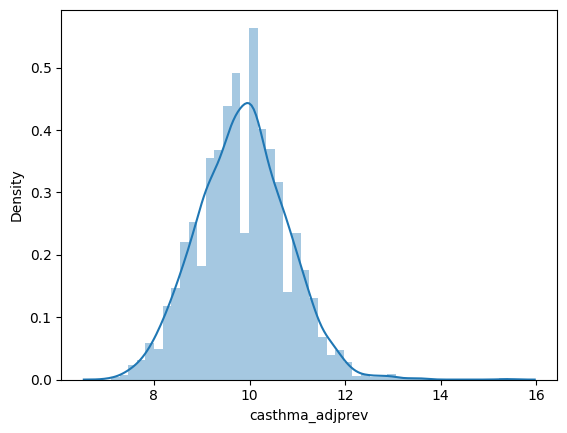

In [76]:
sns.distplot(df_merged.casthma_adjprev)

<Axes: xlabel='casthma_adjprev', ylabel='Density'>

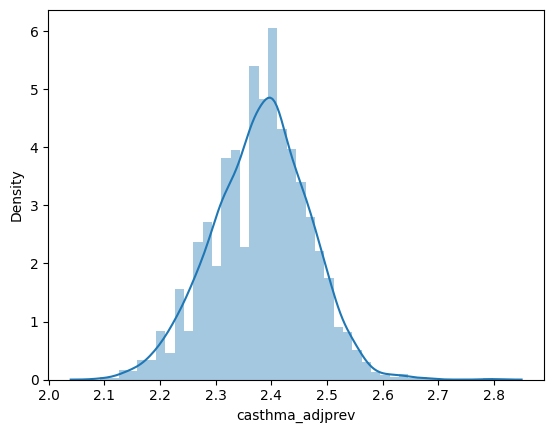

In [77]:
sns.distplot(np.log1p(df_merged.casthma_adjprev))

In [78]:
#Split data to training, validation and test set

In [79]:
df_full_train, df_test = train_test_split(df_merged, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.casthma_adjprev.values)
y_val = np.log1p(df_val.casthma_adjprev.values)
y_test = np.log1p(df_test.casthma_adjprev.values)

del df_train['casthma_adjprev']
del df_val['casthma_adjprev']
del df_test['casthma_adjprev']

print(len(df_train))
print(len(df_val))
print(len(df_test))

1738
580
580


In [80]:
df_full_train, df_test = train_test_split(df_merged, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.casthma_adjprev.values
y_val = df_val.casthma_adjprev.values
y_test = df_test.casthma_adjprev.values

del df_train['casthma_adjprev']
del df_val['casthma_adjprev']
del df_test['casthma_adjprev']

print(len(df_train))
print(len(df_val))
print(len(df_test))

1738
580
580


In [81]:
#EDA:Heatmap showing correlations between numerical data

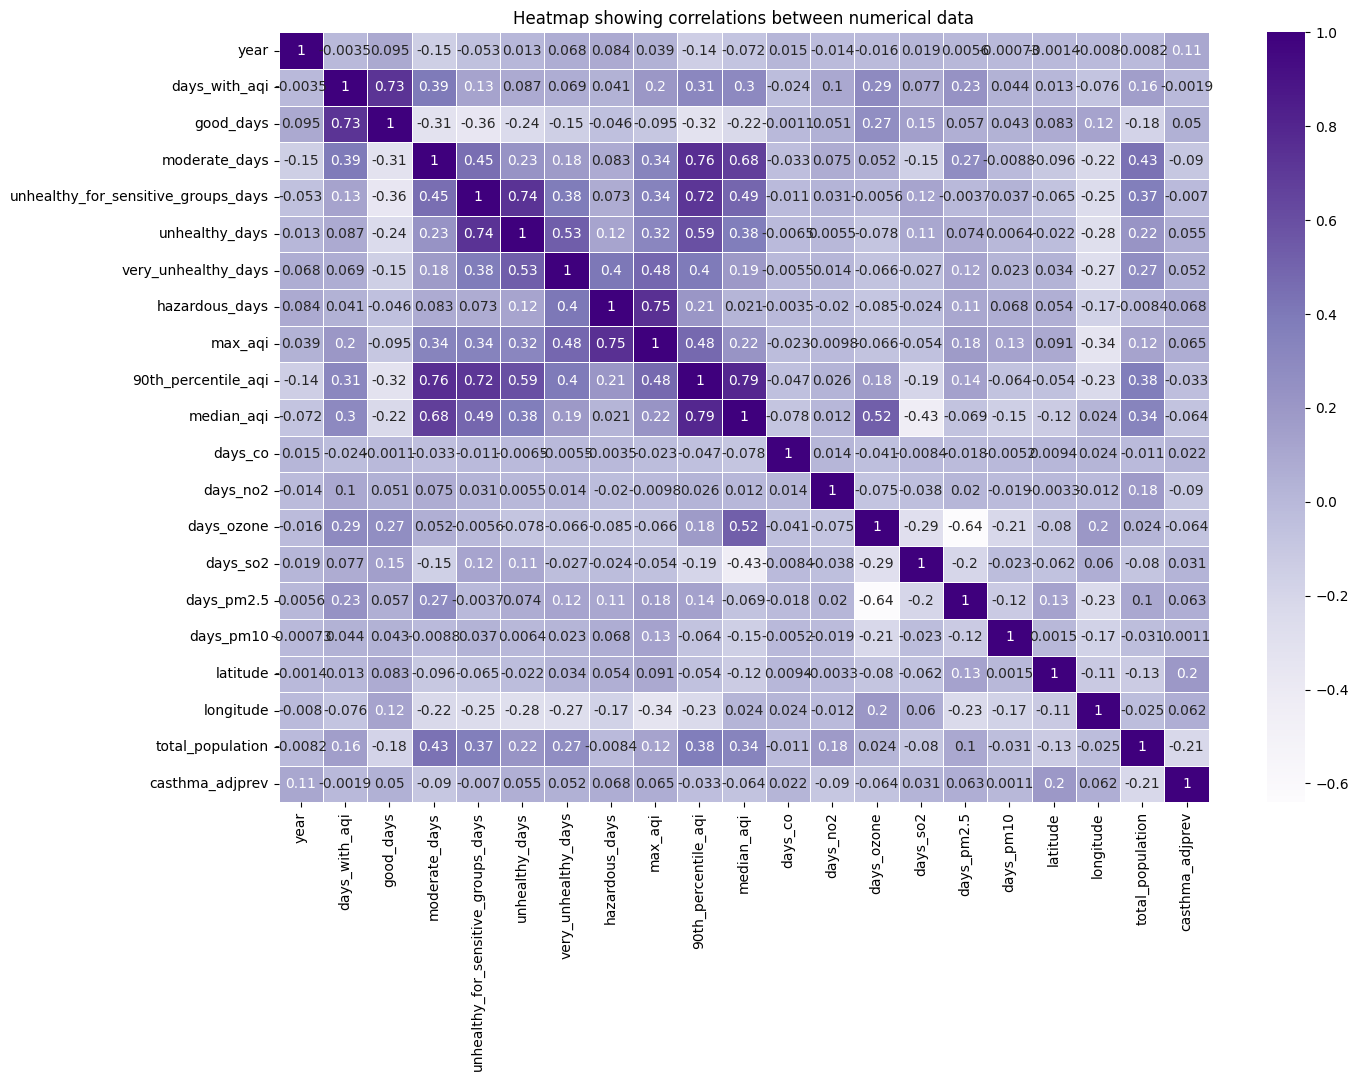

In [82]:
data_numeric = df_full_train.copy()
data_numeric = df_full_train.drop(['state', 'county'], axis=1)
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Purples")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [83]:
#EDA: The same correlations between numerical data but in text format:

In [84]:
data_numeric.corr().unstack().sort_values(ascending = False).head(45)

year                                 year                                   1.000000
days_co                              days_co                                1.000000
moderate_days                        moderate_days                          1.000000
unhealthy_for_sensitive_groups_days  unhealthy_for_sensitive_groups_days    1.000000
unhealthy_days                       unhealthy_days                         1.000000
very_unhealthy_days                  very_unhealthy_days                    1.000000
hazardous_days                       hazardous_days                         1.000000
max_aqi                              max_aqi                                1.000000
90th_percentile_aqi                  90th_percentile_aqi                    1.000000
days_no2                             days_no2                               1.000000
days_with_aqi                        days_with_aqi                          1.000000
days_ozone                           days_ozone                  

In [85]:
#EDA: Correlations between categorical data and target variable

In [86]:
#EDA: To compare correlations let's transform numerical 'casthma_adjprev' data to categorical
pd.cut(np.log1p(df_full_train.casthma_adjprev), bins=10).value_counts()

casthma_adjprev
(2.374, 2.445]    751
(2.303, 2.374]    598
(2.445, 2.515]    396
(2.233, 2.303]    334
(2.515, 2.586]    105
(2.162, 2.233]    103
(2.586, 2.656]     16
(2.091, 2.162]     12
(2.656, 2.727]      2
(2.727, 2.797]      1
Name: count, dtype: int64

In [87]:
#EDA: Results for categorical data correlations:
qcasthma = pd.qcut(df_full_train.casthma_adjprev, q=10)
from sklearn.metrics import normalized_mutual_info_score
print('Correlation between County and asthma:', normalized_mutual_info_score(df_full_train.county, qcasthma))
print('Correlation between  State and asthma:', normalized_mutual_info_score(df_full_train.state, qcasthma))
print('Correlation between County and  State:', normalized_mutual_info_score(df_full_train.county, df_full_train.state))

Correlation between County and asthma: 0.3109651935784473
Correlation between  State and asthma: 0.15475970669059033
Correlation between County and  State: 0.6484255919552016


In [88]:
#Let's create dictionaries for training and validation data:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [89]:
#Fit and transform model
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# 1st model is a linear "Lasso" model with alpha parameter tuning

In [90]:
best_score = float('inf')  # Store the best RMSE value
best_alpha = None  # Store the best alpha

# Iterate over various alpha values
for a in [0, 0.001, 0.01, 0.1, 2, 3, 4]:
    lr = Lasso(alpha=a)
    lr.fit(X_train, y_train)

    # Predict and calculate RMSE
    y_pred = lr.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Display alpha and RMSE values
    print('a: ', a, 'score: ', score)
    
    # Update the best value if a smaller RMSE is found
    if score < best_score:
        best_score = score
        best_alpha = a

# Print the best result
print("\nBest RMSE:", best_score)
print("Best alpha:", best_alpha)


a:  0 score:  0.6509012749464888
a:  0.001 score:  0.6201818515042292
a:  0.01 score:  0.7429198026599773
a:  0.1 score:  0.8742238906771511
a:  2 score:  0.9004511577521969
a:  3 score:  0.9009028241227401
a:  4 score:  0.9015118947236864

Best RMSE: 0.6201818515042292
Best alpha: 0.001


# 2nd model is a linear "Ridge" model with alpha parameter tuning

In [91]:
best_score = float('inf')  # Store the best RMSE value
best_alpha = None  # Store the best alpha

# Iterate over different alpha values
for a in [0.001, 0.01, 0.1, 2, 3, 3.5, 4, 10]:
    model = Ridge(alpha=a, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate RMSE
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Display alpha and RMSE values
    print('a: ', a, 'score: ', score)
    
    # Update the best value if a smaller RMSE is found
    if score < best_score:
        best_score = score
        best_alpha = a

# Print the result best
print("\nBest RMSE:", best_score)
print("Best alpha:", best_alpha)


a:  0.001 score:  0.6498736148399675
a:  0.01 score:  0.6407509827974912
a:  0.1 score:  0.5943919894232257
a:  2 score:  0.5713600237360318
a:  3 score:  0.5853544105199667
a:  3.5 score:  0.5913030940821072
a:  4 score:  0.5966448968678613
a:  10 score:  0.6360719131821686

Best RMSE: 0.5713600237360318
Best alpha: 2


# 3rd model is a tree "DecisionTreeRegressor" with max_depth param tuning

In [92]:
best_score = float('inf')  # Store the best RMSE value
best_max_depth = None  # Store the best max_depth

# Iterate over various max_depth values
for a in [3, 5, 7, 10, 15, 20, 30]:
    dt = DecisionTreeRegressor(max_depth=a)
    dt.fit(X_train, y_train)
    
    # Predict and calculate RMSE
    y_pred = dt.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # isplay max_depth and RMSE values
    print('max_depth: ', a, 'score: ', score)
    
    # Update the best value if a smaller RMSE is found
    if score < best_score:
        best_score = score
        best_max_depth = a

# Print the result best
print("\nBest RMSE:", best_score)
print("Best max_depth:", best_max_depth)


max_depth:  3 score:  0.85686259797954
max_depth:  5 score:  0.7777704300437852
max_depth:  7 score:  0.7201148984199408
max_depth:  10 score:  0.6586887686411583
max_depth:  15 score:  0.6215799787247384
max_depth:  20 score:  0.6385052755970828
max_depth:  30 score:  0.6609670374299806

Best RMSE: 0.6215799787247384
Best max_depth: 15


In [93]:
# Let's test our model with data from test dataset (just one example).
test_dicts = df_test.iloc[6].to_dict()
X_test = dv.transform(test_dicts)
y_pred = dt.predict(X_test)
print(np.expm1(y_pred))
print(np.expm1(y_test[6]))

[6633.24400628]
4022.872393822313


In [94]:
# Our tree model lokks like:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- latitude <= 30.46
|   |--- total_population <= 340014.50
|   |   |--- good_days <= 177.00
|   |   |   |--- days_pm2.5 <= 132.00
|   |   |   |   |--- total_population <= 110741.00
|   |   |   |   |   |--- moderate_days <= 11.00
|   |   |   |   |   |   |--- value: [9.90]
|   |   |   |   |   |--- moderate_days >  11.00
|   |   |   |   |   |   |--- value: [9.90]
|   |   |   |   |--- total_population >  110741.00
|   |   |   |   |   |--- value: [10.10]
|   |   |   |--- days_pm2.5 >  132.00
|   |   |   |   |--- value: [10.70]
|   |   |--- good_days >  177.00
|   |   |   |--- days_with_aqi <= 345.50
|   |   |   |   |--- days_ozone <= 336.50
|   |   |   |   |   |--- total_population <= 58603.50
|   |   |   |   |   |   |--- value: [8.80]
|   |   |   |   |   |--- total_population >  58603.50
|   |   |   |   |   |   |--- days_with_aqi <= 324.00
|   |   |   |   |   |   |   |--- latitude <= 28.54
|   |   |   |   |   |   |   |   |--- value: [8.60]
|   |   |   |   |   |   |   |--- latitude >  28

# 4th model is an ensemble "RandomForestRegressor" with n_estimators and max_depth parameters tuning

In [95]:
scores = []

for d in tqdm([10, 15, 20, 45]):
    rfr = RandomForestRegressor(n_estimators=0,
                               max_depth=d,
                               random_state=1, n_jobs=-1,
                               warm_start=True)

    for n in tqdm(range(10, 221, 10)):
        rfr.n_estimators = n
        rfr.fit(X_train, y_train)

        y_pred = rfr.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

In [96]:
# Find the row with the minimum RMSE
best_score_row = df_scores.loc[df_scores['rmse'].idxmin()]

# Print the best RMSE and corresponding parameters
print(f"Best RMSE: {best_score_row['rmse']}")
print(f"Best parameters: max_depth={best_score_row['max_depth']}, n_estimators={best_score_row['n_estimators']}")


Best RMSE: 0.5005337566914209
Best parameters: max_depth=45.0, n_estimators=180.0


In [97]:
# Let's test our model with data from test dataset (just one example).
test_dicts = df_test.iloc[6].to_dict()
X_test = dv.transform(test_dicts)
y_pred = rfr.predict(X_test)
print(np.expm1(y_pred))
print(np.expm1(y_test[6]))

[5241.45644428]
4022.872393822313


# The best model is an ensemble "RandomForestRegressor" with max_depth=45 and n_estimators=210
It gives *0.052* RMSE. 
Other models: DecisionTree: 0.062, Ringe: 0.054, Lasso: 0.060

In [98]:
#EDA: Feature importance analysis.

In [99]:
fr = RandomForestRegressor(n_estimators=210, max_depth=45, 
                           random_state=42, n_jobs=-1)
fr.fit(X_train, y_train)

df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names_out()
df_importances['importance'] = fr.feature_importances_
df_importances.sort_values(by='importance', ascending=False).head(12)

,feature,importance
719,latitude,0.187797
720,longitude,0.154377
772,total_population,0.111207
758,state=Oregon,0.031775
776,year,0.030783
721,max_aqi,0.024909
714,days_pm2.5,0.023850
757,state=Oklahoma,0.023762
717,good_days,0.023103
712,days_ozone,0.022022


In [100]:
# Let's save our best model and dictionary for "RandomForestRegressor" 
model_file = 'model1.bin'
dv_file = 'dv1.bin'

with open(model_file, 'wb') as f_out: 
    pickle.dump((fr), f_out)

with open(dv_file, 'wb') as f_out: 
    pickle.dump((dv), f_out)
    
fr

RandomForestRegressor(max_depth=45, n_estimators=210, n_jobs=-1,
                      random_state=42)